In [73]:
import pandas as pd
import numpy as np
from scipy.sparse import csc_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
def load_sparse_csc(filename):
        loader = np.load(filename)
        return csc_matrix((loader['data'],loader['indices'],loader['indptr']),shape = loader['shape'])

In [111]:
data = pd.read_csv('../data/2017.csv',usecols=['skill_estimate','skill_estimate_percentile','not_seen',
                                               'observation_count','observation_count_percentile',
                                               'Player_First_Name','Player_Last_Name','baby_cat','Player_Index',
                                               'tourn_num'])

In [112]:
data.sort_values('observation_count_percentile',ascending=True).head(10)

,Player_First_Name,Player_Last_Name,tourn_num,baby_cat,Player_Index,skill_estimate,observation_count,not_seen,skill_estimate_percentile,observation_count_percentile
832519,Grant,Leaver,572,fairway0,1405,1.111380,3.694421,False,0.92074,0.001321
832576,Grant,Leaver,572,fairway0,1405,1.111380,3.694421,False,0.92074,0.001321
832416,Grant,Leaver,572,fairway0,1405,1.111380,3.694421,False,0.92074,0.001321
630702,Brett,Coletta,566,fairway300,2005,0.637091,353.776832,False,0.01145,0.003817
630644,Brett,Coletta,566,fairway300,2005,0.637091,353.776832,False,0.01145,0.003817
630651,Brett,Coletta,566,fairway300,2005,0.637091,353.776832,False,0.01145,0.003817
631828,Brett,Coletta,566,fairway300,2005,0.637091,353.776832,False,0.01145,0.003817
631751,Brett,Coletta,566,fairway300,2005,0.637091,353.776832,False,0.01145,0.003817
631850,Brett,Coletta,566,fairway300,2005,0.637091,353.776832,False,0.01145,0.003817
630618,Brett,Coletta,566,fairway300,2005,0.637091,353.776832,False,0.01145,0.003817


In [130]:
data.groupby('baby_cat').apply(lambda x: x[x.observation_count_percentile>.95]\
                                         .sort_values('skill_estimate_percentile',ascending=False)\
                                         .iloc[0].reset_index(drop=True))

,0,1,2,3,4,5,6,7,8,9
baby_cat,,,,,,,,,,
bunker,Brandt,Snedeker,557,bunker,736,1.111014,6.793442e+04,False,0.887755,0.956633
fairway0,Matt,Kuchar,555,fairway0,411,1.106957,8.657614e+04,False,0.905972,0.958069
fairway300,David,Hearn,565,fairway300,508,1.055420,7.331019e+05,False,0.909669,0.993639
fairway540,Kevin,Chappell,546,fairway540,1244,1.063083,5.312149e+05,False,0.855844,0.975325
green0,Michael,Kim,571,green0,1698,1.017364,4.757396e+05,False,0.850727,0.963012
green10,Adam,Hadwin,560,green10,1400,1.036416,7.718386e+04,False,0.818528,0.987310
green20,Camilo,Villegas,554,green20,745,1.043929,1.404609e+05,False,0.888183,0.959339
green5,Harris,English,564,green5,1585,1.055301,5.538937e+04,False,0.856599,0.982234
other,Luke,Donald,552,other,437,1.153670,1.062923e+04,False,0.841017,0.957075


In [119]:
from scipy.stats import norm

In [125]:
def my_norm(x,BETA):
    return norm.pdf(x,0,BETA)/norm.pdf(0,0,BETA)

In [129]:
my_norm(10,5)

0.1353352832366127

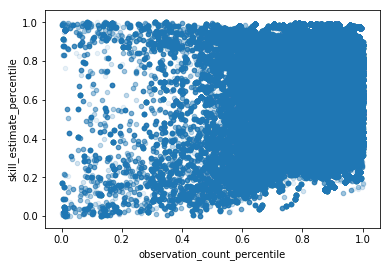

In [103]:
data.plot('observation_count_percentile','skill_estimate_percentile',kind='scatter',alpha=.1);

In [104]:
data[['observation_count_percentile','skill_estimate_percentile']].corr()

,observation_count_percentile,skill_estimate_percentile
observation_count_percentile,1.000000,0.138016
skill_estimate_percentile,0.138016,1.000000


In [26]:
a = np.array([[4,np.nan,3],[3,2,2],[np.nan,1,1],[2,1,4],[-1,1,1]])

In [27]:
pd.DataFrame(a)

,0,1,2
0,4.0,NaN,3.0
1,3.0,2.0,2.0
2,NaN,1.0,1.0
3,2.0,1.0,4.0
4,-1.0,1.0,1.0


In [30]:
from scipy.stats import rankdata

In [32]:
rankdata(a[:,0])

array([ 4.,  3.,  5.,  2.,  1.])

In [53]:
a.sum(1)

array([ nan,   7.,  nan,   7.,   1.])

In [62]:
np.apply_along_axis(lambda x: rank(x,~np.isnan(x)),0,a)

[ 4.  3.  2.  1.]
[ 4.  2.  2.  2.]
[ 4.   3.   1.5  5.   1.5]


array([[ 1.  ,   nan,  0.8 ],
       [ 0.75,  1.  ,  0.6 ],
       [  nan,  0.5 ,  0.3 ],
       [ 0.5 ,  0.5 ,  1.  ],
       [ 0.25,  0.5 ,  0.3 ]])

In [60]:
def rank(a,mask):
    res = np.ones_like(a)
    print rankdata(a[mask])
    res[mask] = rankdata(a[mask])/mask.sum()
    res[~mask] = np.nan
    return res

In [58]:
a_ma = np.ma.MaskedArray(a,np.isnan(a))

In [45]:
a

array([[  4.,  nan,   3.],
       [  3.,   2.,   2.],
       [ nan,   1.,   1.],
       [  2.,   1.,   4.],
       [ -1.,   1.,   1.]])

In [44]:
np.ma.argsort(a_ma,0)

array([[4, 2, 2],
       [3, 3, 4],
       [1, 4, 1],
       [0, 1, 0],
       [2, 0, 3]])

In [37]:
rank(a[:,0],~np.isnan(a[:,0]))

array([ 0.5  ,  0.375,  0.25 ,  0.125])

In [29]:
pd.DataFrame(a).rank(ascending=False,pct=True,axis=1,na_option='a').values

array([[ 0.66666667,  0.33333333,  1.        ],
       [ 0.33333333,  0.83333333,  0.83333333],
       [ 0.33333333,  0.83333333,  0.83333333],
       [ 0.66666667,  1.        ,  0.33333333],
       [ 1.        ,  0.5       ,  0.5       ]])

In [4]:
data.head()

,skill_estimate,observation_count,not_seen,skill_estimate_percentile,observation_count_percentile
0,NaN,NaN,False,0.843426,NaN
1,NaN,NaN,False,NaN,NaN
2,NaN,NaN,False,NaN,NaN
3,NaN,NaN,False,NaN,NaN
4,NaN,NaN,False,NaN,NaN


In [5]:
data.tail()

,skill_estimate,observation_count,not_seen,skill_estimate_percentile,observation_count_percentile
951995,1.099024,4.345218e+06,False,0.071799,0.929931
951996,0.995502,1.068716e+05,False,0.701557,0.929931
951997,1.056108,3.491711e+04,False,0.054498,0.936851
951998,0.995502,1.068716e+05,False,0.701557,0.929931
951999,0.989980,4.120507e+04,False,0.828901,0.573529


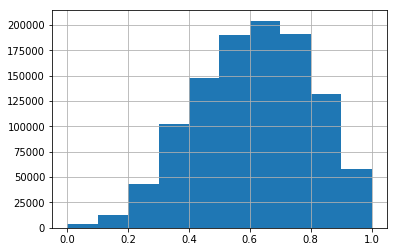

In [105]:
data.skill_estimate_percentile.hist()

In [107]:
cols = ['tourn_num']
data = pd.concat([pd.read_csv('../data/%d.csv' % year,usecols=cols) for year in range(2003,2018)])

In [110]:
vals = data['tourn_num'].drop_duplicates().sort_values().values 
np.all(vals==np.arange(len(vals)))

True